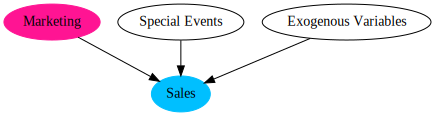

In [1]:
import graphviz as gr

g = gr.Digraph()
g.node(name="Sales", label="Sales", color="deepskyblue", style="filled")
g.node(name="Marketing", label="Marketing", color="deeppink", style="filled")
g.edge(tail_name="Special Events", head_name="Sales")
g.edge(tail_name="Marketing", head_name="Sales")
g.edge(tail_name="Exogenous Variables", head_name="Sales")
g

In [2]:
!pip install git+https://github.com/pymc-labs/pymc-marketing.git

  Cloning https://github.com/pymc-labs/pymc-marketing.git to /tmp/pip-req-build-zv_nv8qz
  Running command git clone --filter=blob:none --quiet https://github.com/pymc-labs/pymc-marketing.git /tmp/pip-req-build-zv_nv8qz
  Resolved https://github.com/pymc-labs/pymc-marketing.git to commit f51f9f54404f7149ecf384c2833cc85897ea1879
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.6/517.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 10.0 MB/s eta 0:00:00
  Created wheel for pymc-marketing: filename=pymc_marketing-0.15.1-py3-none-any.whl size=298127 sha256=fba1bcec15be32aa354d3a072eecc868fd6846dc4b1c4cd2b51413b473d52b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-yfpkiwqm/wheels/74/4e/df/061764542e2335eb91488d930c91f3e06058325d53a008deb7
Successfully built pymc-marketing


In [3]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from pymc_marketing.prior import Prior

warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
seed: int = sum(map(ord, "mmm"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

In [5]:
df = pd.read_excel('drive/MyDrive/LEVEL/raw_data.xlsx')

In [6]:
df

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,CLASSIFIEDS CIAN,CLASSIFIEDS IRN,CLASSIFIEDS NOVOSTROY GID,CLASSIFIEDS NOVOSTROY-M,CLASSIFIEDS OTHER,CLASSIFIEDS CIAN_IMP,CLASSIFIEDS IRN_IMP,CLASSIFIEDS NOVOSTROY GID_IMP,CLASSIFIEDS NOVOSTROY-M_IMP,CLASSIFIEDS OTHER_IMP
0,1,2022-01-01,0.000000e+00,0,0,0,0,0.000000,0.000000e+00,1.061911e+08,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.0
1,2,2022-01-08,0.000000e+00,0,0,0,0,0.000000,1.259346e+08,1.061911e+08,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.0
2,3,2022-01-15,1.499831e+08,0,0,0,0,351577.741728,2.478954e+09,1.061911e+08,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.0
3,4,2022-01-22,1.720732e+08,0,0,0,0,378182.931218,1.162480e+09,1.061911e+08,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.0
4,5,2022-01-29,3.001308e+08,0,0,0,0,348139.218366,1.424906e+09,1.061911e+08,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,9,2024-03-02,7.757214e+07,0,1,0,0,376198.565369,1.125617e+09,2.753990e+08,...,1.136064e+06,59881.254727,0.0,213492.369299,0.0,1086990.12,752375.30,0.0,99543.28,0.0
114,10,2024-03-09,3.281116e+08,0,1,0,0,422008.435731,4.755848e+09,2.753990e+08,...,0.000000e+00,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.0
115,11,2024-03-16,1.688026e+08,0,1,0,0,447277.755918,1.861577e+09,2.753990e+08,...,6.551482e+05,29362.064516,0.0,106806.451613,0.0,589485.28,483184.12,0.0,53298.50,0.0
116,12,2024-03-23,2.544332e+08,0,1,0,0,390714.315093,3.275989e+09,2.753990e+08,...,6.850224e+05,29362.064516,0.0,106806.451613,0.0,598050.88,318181.08,0.0,48859.18,0.0


In [7]:
channels =[
  'OTHER MEDIA',
  'PROGRAMMATIC',
 'OOH',
 'CONTEXT BRANDED GOOGLE',
 'CONTEXT BRANDED YANDEX',
 'CONTEXT UNBRANDED GOOGLE',
 'CONTEXT UNBRANDED YANDEX',
 'BASES AVITO',
 'BASES CIAN',
 'BASES YANDEX',
 'BASES OTH',
 'BASES M2',
 'BASES DOMCLICK',
 'CLASSIFIEDS CIAN',
 'CLASSIFIEDS IRN',
 'CLASSIFIEDS NOVOSTROY GID',
 'CLASSIFIEDS NOVOSTROY-M',
 'CLASSIFIEDS OTHER']




In [8]:
df['day_of_year'] = df['date_week'].dt.dayofyear

In [9]:
df['date_week']

,date_week
0,2022-01-01
1,2022-01-08
2,2022-01-15
3,2022-01-22
4,2022-01-29
...,...
113,2024-03-02
114,2024-03-09
115,2024-03-16
116,2024-03-23


In [10]:
df['log_sales'] = np.log1p(df['SALES']/1e6)

In [50]:
X = df[[*channels, 'date_week']]
y = df['SALES']

In [51]:
mmm = MMM(
    #model_config=my_model_config,
    #sampler_config=my_sampler_config,
    date_column="date_week",
    adstock=GeometricAdstock(l_max=8),
    saturation=LogisticSaturation(),
    channel_columns=channels,
    #control_columns=["day_of_year", '#_week'],
    yearly_seasonality=2,
)

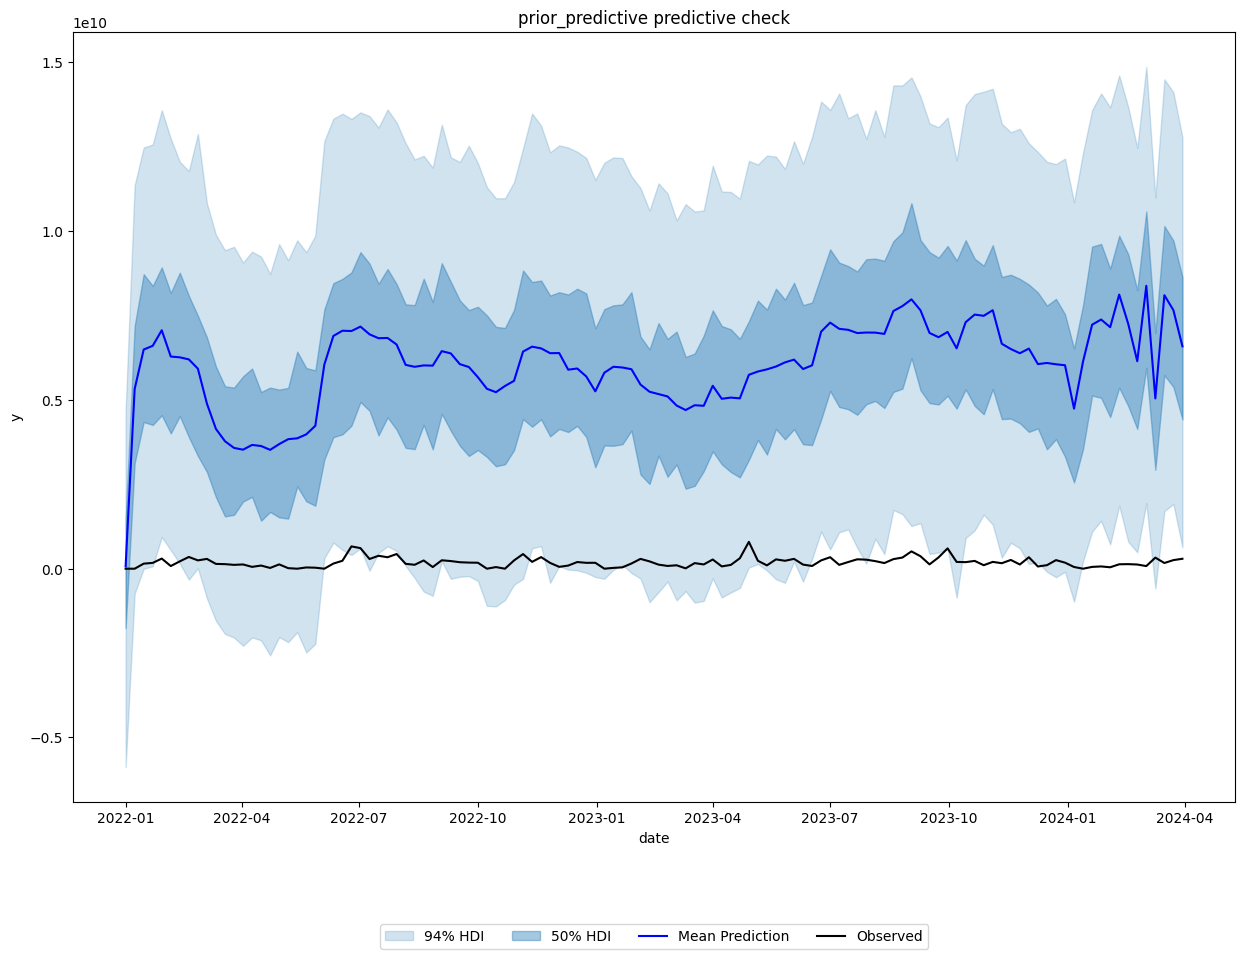

In [52]:
# Generate prior predictive samples
mmm.sample_prior_predictive(X, y, samples=2_000)

fig, ax = plt.subplots(figsize = (15,10))
mmm.plot_prior_predictive(ax=ax, original_scale=True)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4);

In [14]:
!pip install numpyro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 kB 34.6 MB/s eta 0:00:00


In [53]:
mmm.fit(X=X, y=y,
        chains=4,
        target_accept=0.85,
        nuts_sampler="numpyro",
        random_seed=rng)

/usr/local/lib/python3.11/dist-packages/pymc/sampling/jax.py:475: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  pmap_numpyro = MCMC(
sample: 100%|██████████| 2000/2000 [01:20<00:00, 25.00it/s, 63 steps of size 4.59e-02. acc. prob=0.93] 


Output()

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> fit_data

In [54]:
mmm.sample_posterior_predictive(X, extend_idata=True, combined=True)

Output()

<xarray.Dataset> Size: 4MB
Dimensions:  (sample: 4000, date: 118)
Coordinates:
  * date     (date) datetime64[ns] 944B 2022-01-01 2022-01-08 ... 2024-03-30
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    y        (date, sample) float64 4MB -3.541e+08 -3.412e+08 ... 1.211e+08
Attributes:
    created_at:                 2025-07-25T00:59:13.179010+00:00
    arviz_version:              0.22.0
    inference_library:          pymc
    inference_library_version:  5.24.1

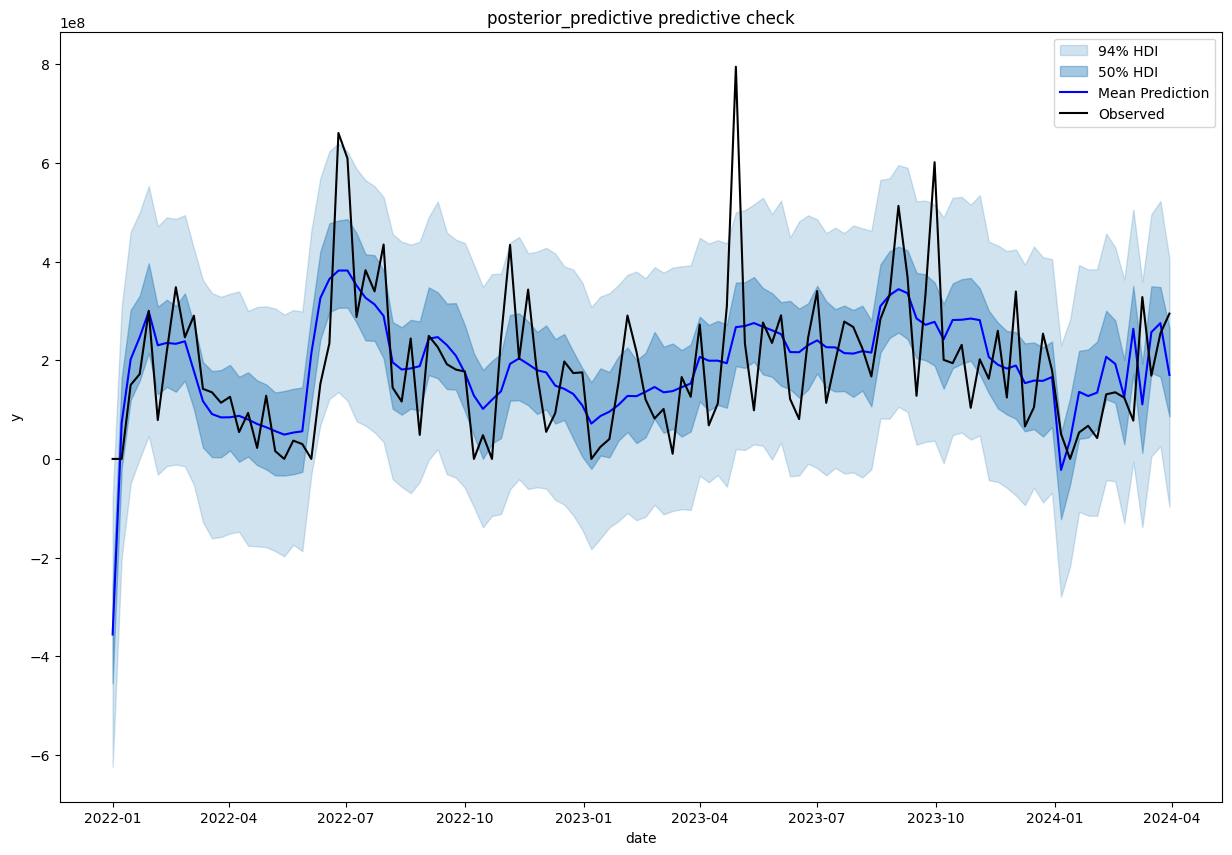

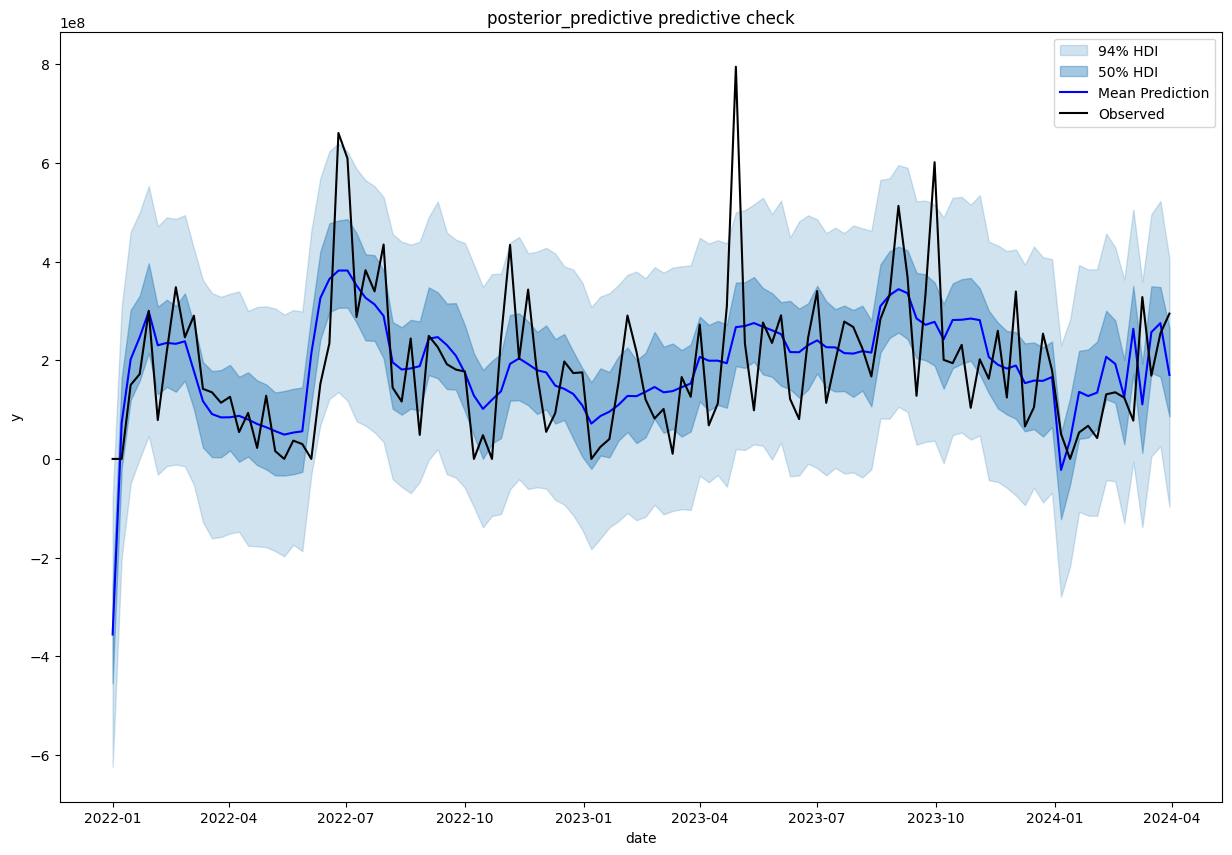

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
mmm.plot_posterior_predictive(ax = ax, original_scale=True)

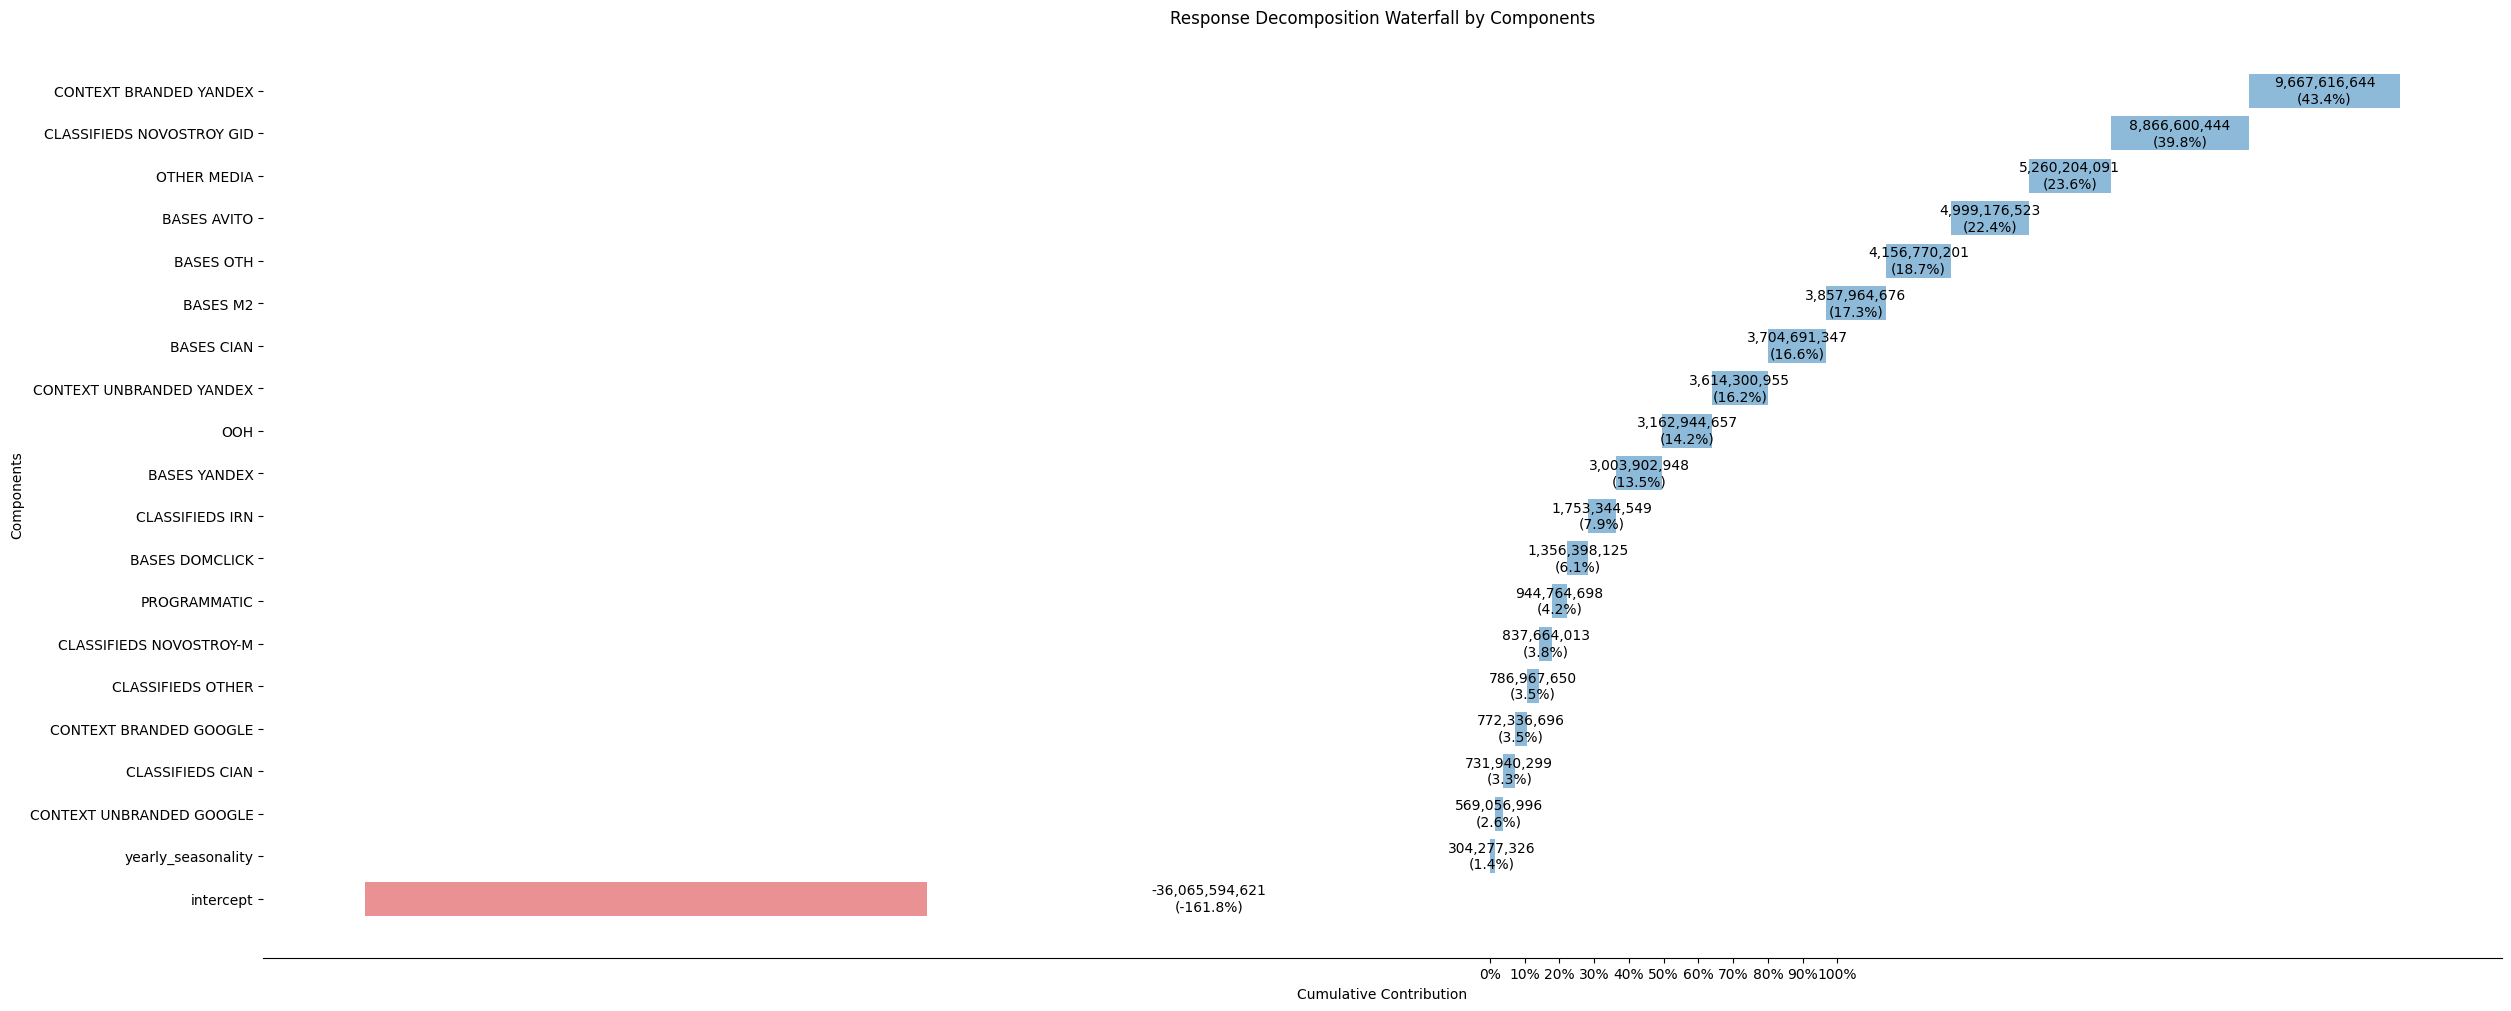

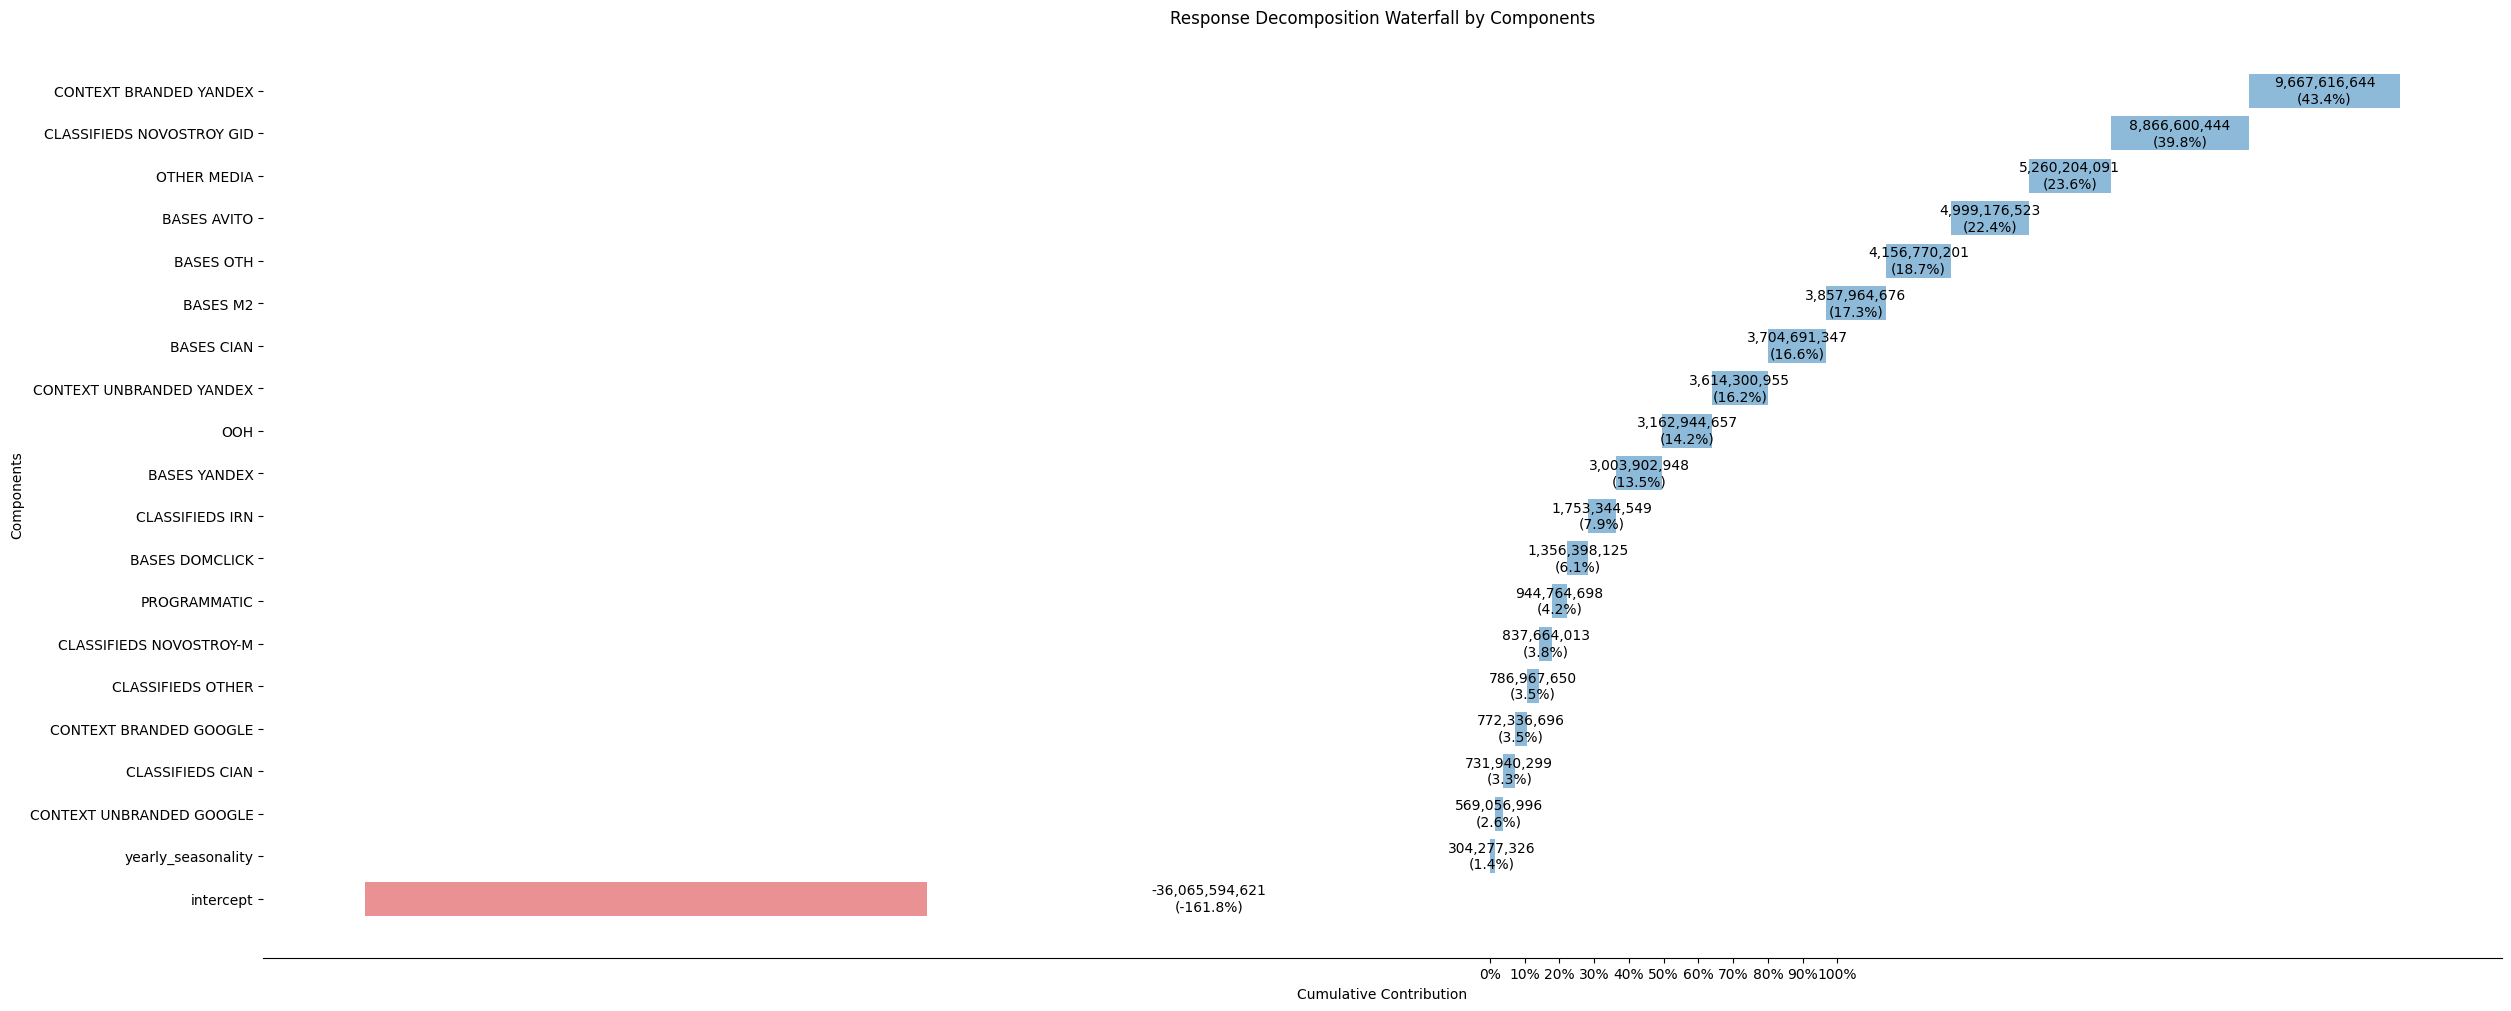

In [79]:
mmm.plot_waterfall_components_decomposition(figsize=(25,10))

[[Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')],
 [Text(0.5, 0, 'x')]]

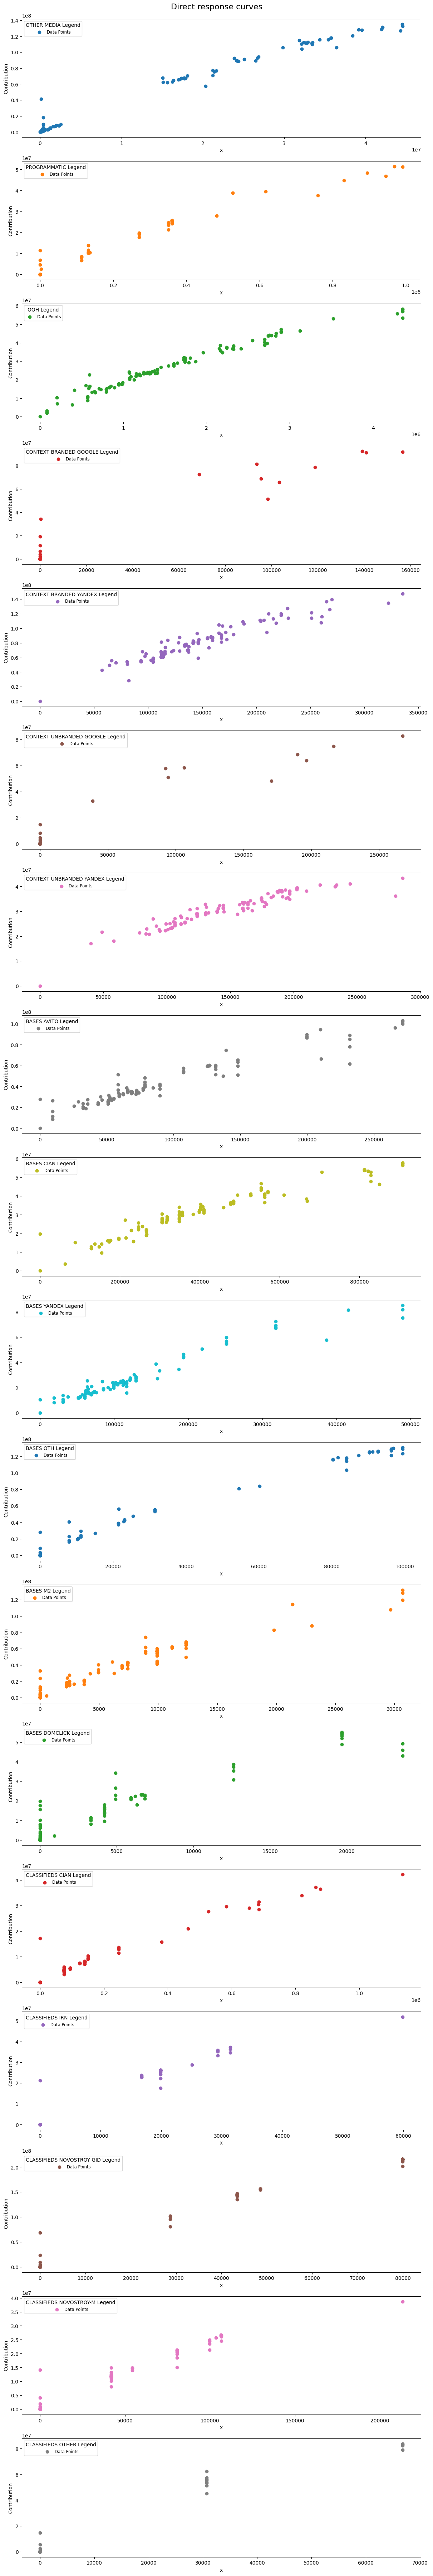

In [57]:
fig = mmm.plot_direct_contribution_curves()
[ax.set(xlabel="x") for ax in fig.axes]

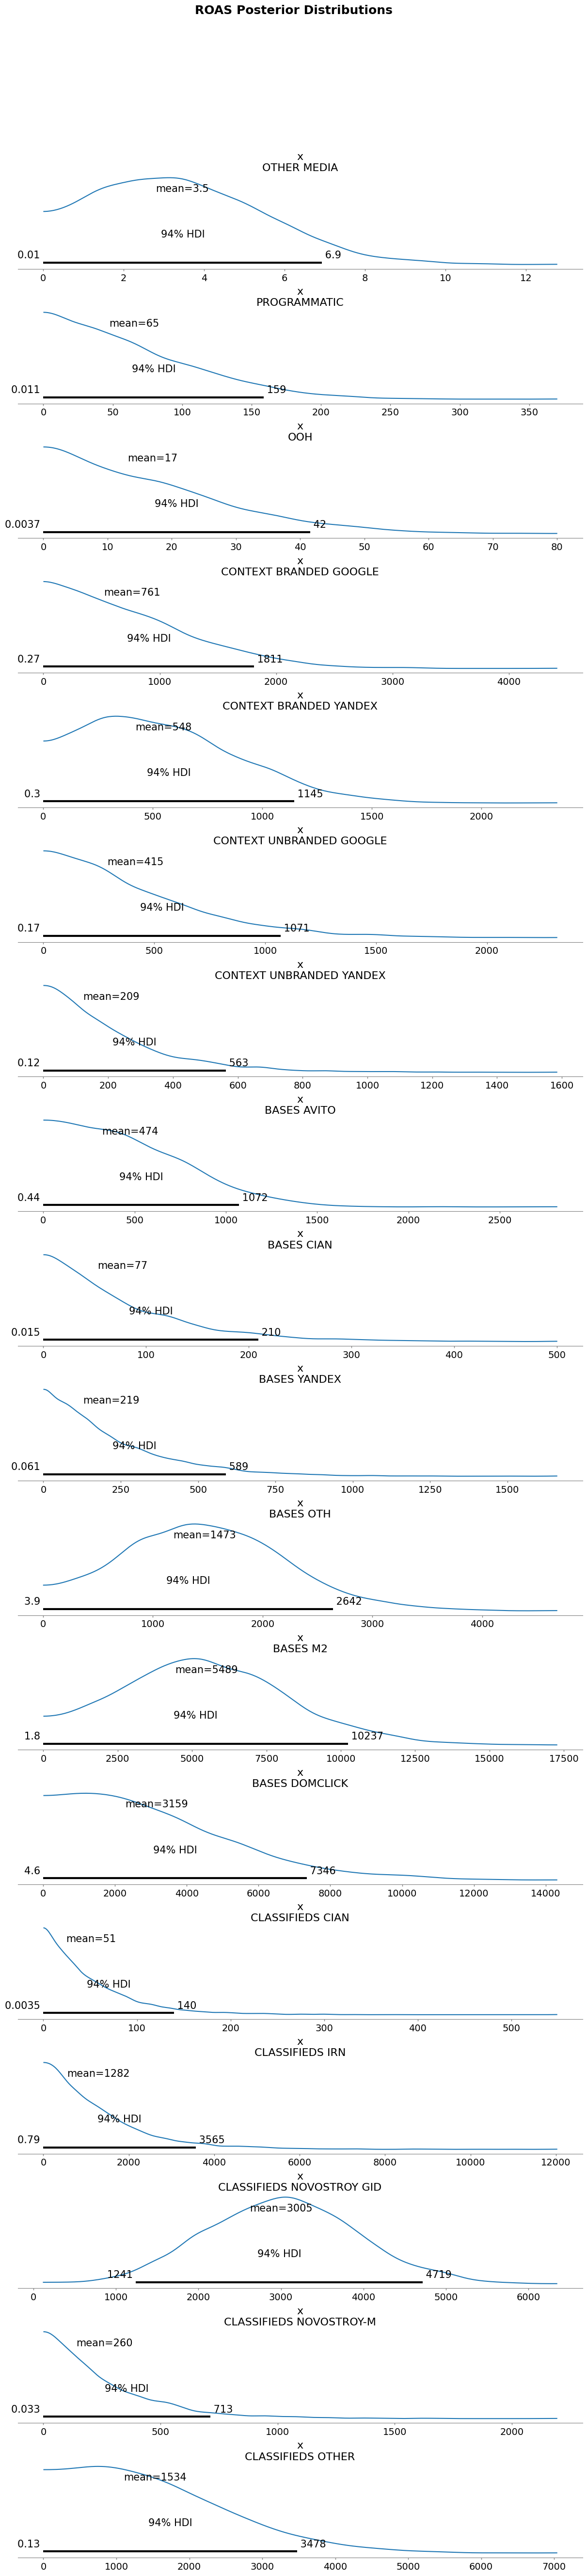

In [64]:
channel_contribution_original_scale = mmm.compute_channel_contribution_original_scale()
spend_sum = X.drop(['date_week'], axis = 1).sum().to_numpy()

roas_samples = (
    channel_contribution_original_scale.sum(dim="date")
    / spend_sum[np.newaxis, np.newaxis, :]
)

fig, axes = plt.subplots(
    nrows=len(X.columns)-1, ncols=1, figsize=(12, 50), sharex=False, sharey=False, layout="constrained"
)
az.plot_posterior(roas_samples,
                  #ref_val=[roas_1, roas_2],
                  ax=axes)
# axes[0].set(title="Channel $x_{1}$")
# axes[1].set(title="Channel $x_{2}$", xlabel="ROAS")
fig.suptitle("ROAS Posterior Distributions", fontsize=18, fontweight="bold", y=1.06);

In [92]:
mmm.save("/content/drive/MyDrive/LEVEL/model.nc")

In [93]:
# Параметры модели — выборки из апостериорного распределения
trace = mmm.trace

# Например, получить средние значения по каждой цепи:
betas = trace.posterior["beta"].mean(dim=["chain", "draw"]).values  # shape: (n_channels,)
alphas = trace.posterior["alpha"].mean(dim=["chain", "draw"]).values
gammas = trace.posterior["gamma"].mean(dim=["chain", "draw"]).values

AttributeError: 'MMM' object has no attribute 'trace'

In [101]:
params = az.summary(
    data=
    mmm.fit_result,
    var_names=[
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
    ],
)['mean']
params

,mean
saturation_beta[OTHER MEDIA],0.363
saturation_beta[PROGRAMMATIC],0.138
saturation_beta[OOH],0.149
saturation_beta[CONTEXT BRANDED GOOGLE],0.228
saturation_beta[CONTEXT BRANDED YANDEX],0.447
saturation_beta[CONTEXT UNBRANDED GOOGLE],0.213
saturation_beta[CONTEXT UNBRANDED YANDEX],0.119
saturation_beta[BASES AVITO],0.265
saturation_beta[BASES CIAN],0.154
saturation_beta[BASES YANDEX],0.262


In [119]:
tmp = params.reset_index()
betas = tmp[tmp['index'].apply(lambda x: 'saturation_beta' in x)]
betas['index'] = betas['index'].apply(lambda x: x[len('saturation_beta['):-1])
beta_dict = betas.set_index('index').to_dict()['mean']
beta_dict

/tmp/ipython-input-119-2114230942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betas['index'] = betas['index'].apply(lambda x: x[len('saturation_beta['):-1])


{'OTHER MEDIA': 0.363,
 'PROGRAMMATIC': 0.138,
 'OOH': 0.149,
 'CONTEXT BRANDED GOOGLE': 0.228,
 'CONTEXT BRANDED YANDEX': 0.447,
 'CONTEXT UNBRANDED GOOGLE': 0.213,
 'CONTEXT UNBRANDED YANDEX': 0.119,
 'BASES AVITO': 0.265,
 'BASES CIAN': 0.154,
 'BASES YANDEX': 0.262,
 'BASES OTH': 0.318,
 'BASES M2': 0.35,
 'BASES DOMCLICK': 0.162,
 'CLASSIFIEDS CIAN': 0.111,
 'CLASSIFIEDS IRN': 0.146,
 'CLASSIFIEDS NOVOSTROY GID': 0.471,
 'CLASSIFIEDS NOVOSTROY-M': 0.11,
 'CLASSIFIEDS OTHER': 0.167}

In [116]:
tmp = params.reset_index()
alphas = tmp[tmp['index'].apply(lambda x: 'adstock_alpha' in x)]
alphas['index'] = alphas['index'].apply(lambda x: x[len('adstock_alpha['):-1])
alpha_dict = alphas.set_index('index').to_dict()['mean']
alpha_dict

/tmp/ipython-input-116-2384787320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alphas['index'] = alphas['index'].apply(lambda x: x[len('adstock_alpha['):-1])


{'OTHER MEDIA': 0.262,
 'PROGRAMMATIC': 0.243,
 'OOH': 0.219,
 'CONTEXT BRANDED GOOGLE': 0.334,
 'CONTEXT BRANDED YANDEX': 0.362,
 'CONTEXT UNBRANDED GOOGLE': 0.31,
 'CONTEXT UNBRANDED YANDEX': 0.284,
 'BASES AVITO': 0.358,
 'BASES CIAN': 0.322,
 'BASES YANDEX': 0.339,
 'BASES OTH': 0.183,
 'BASES M2': 0.275,
 'BASES DOMCLICK': 0.335,
 'CLASSIFIEDS CIAN': 0.292,
 'CLASSIFIEDS IRN': 0.305,
 'CLASSIFIEDS NOVOSTROY GID': 0.234,
 'CLASSIFIEDS NOVOSTROY-M': 0.288,
 'CLASSIFIEDS OTHER': 0.223}

In [117]:
tmp = params.reset_index()
lambdas = tmp[tmp['index'].apply(lambda x: 'saturation_lam' in x)]
lambdas['index'] = lambdas['index'].apply(lambda x: x[len('saturation_lam['):-1])
lambda_dict = lambdas.set_index('index').to_dict()['mean']
lambda_dict

/tmp/ipython-input-117-4019351092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lambdas['index'] = lambdas['index'].apply(lambda x: x[len('saturation_lam['):-1])


{'OTHER MEDIA': 1.948,
 'PROGRAMMATIC': 2.271,
 'OOH': 2.304,
 'CONTEXT BRANDED GOOGLE': 2.484,
 'CONTEXT BRANDED YANDEX': 1.733,
 'CONTEXT UNBRANDED GOOGLE': 2.346,
 'CONTEXT UNBRANDED YANDEX': 2.33,
 'BASES AVITO': 2.169,
 'BASES CIAN': 2.281,
 'BASES YANDEX': 1.928,
 'BASES OTH': 2.112,
 'BASES M2': 2.126,
 'BASES DOMCLICK': 2.272,
 'CLASSIFIEDS CIAN': 2.429,
 'CLASSIFIEDS IRN': 2.303,
 'CLASSIFIEDS NOVOSTROY GID': 2.268,
 'CLASSIFIEDS NOVOSTROY-M': 2.285,
 'CLASSIFIEDS OTHER': 2.875}

In [99]:
get_mean_contributions_over_time_df = mmm.compute_mean_contributions_over_time(
    original_scale=True
)
get_mean_contributions_over_time_df

,OTHER MEDIA,PROGRAMMATIC,OOH,CONTEXT BRANDED GOOGLE,CONTEXT BRANDED YANDEX,CONTEXT UNBRANDED GOOGLE,CONTEXT UNBRANDED YANDEX,BASES AVITO,BASES CIAN,BASES YANDEX,BASES OTH,BASES M2,BASES DOMCLICK,CLASSIFIEDS CIAN,CLASSIFIEDS IRN,CLASSIFIEDS NOVOSTROY GID,CLASSIFIEDS NOVOSTROY-M,CLASSIFIEDS OTHER,yearly_seasonality,intercept
date,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-4.740501e+07,-3.056406e+08
2022-01-08,5.747279e+07,0.000000e+00,8.832201e+06,5.149195e+07,2.869465e+07,4.807776e+07,3.624406e+07,6.166801e+07,3.522572e+06,1.589664e+07,1.033945e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-3.852825e+07,-3.056406e+08
2022-01-15,7.089134e+07,0.000000e+00,1.030731e+07,6.575728e+07,5.914162e+07,6.379234e+07,4.328638e+07,7.823692e+07,9.583537e+06,2.092446e+07,1.143736e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-2.808848e+07,-3.056406e+08
2022-01-22,7.559242e+07,0.000000e+00,1.075654e+07,6.900047e+07,6.741118e+07,6.826294e+07,3.284053e+07,8.541506e+07,1.566176e+07,2.329143e+07,1.172222e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-1.640145e+07,-3.056406e+08
2022-01-29,7.708764e+07,0.000000e+00,1.094117e+07,7.860916e+07,6.922208e+07,8.261445e+07,3.815518e+07,8.913656e+07,1.943079e+07,2.461621e+07,1.182590e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-3.849504e+06,-3.056406e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-02,9.546908e+06,2.529668e+06,4.510242e+07,0.000000e+00,1.132296e+08,0.000000e+00,2.331370e+07,6.642004e+07,4.643793e+07,2.422670e+07,0.000000e+00,4.603686e+06,4.602480e+07,4.213164e+07,5.183470e+07,0.0,3.869802e+07,0.0,5.353250e+07,-3.056406e+08
2024-03-09,3.082081e+06,3.768938e+07,4.422928e+07,0.000000e+00,1.109975e+08,0.000000e+00,2.360341e+07,2.780190e+07,1.964923e+07,1.049349e+07,0.000000e+00,2.174070e+06,1.767271e+07,1.714220e+07,2.117831e+07,0.0,1.411824e+07,0.0,6.253554e+07,-3.056406e+08
2024-03-16,4.879625e+06,4.478970e+07,4.399690e+07,0.000000e+00,1.062908e+08,0.000000e+00,3.202197e+07,3.879711e+07,2.594886e+07,1.873766e+07,0.000000e+00,4.138211e+07,4.920649e+07,2.903016e+07,3.318251e+07,0.0,2.460423e+07,0.0,6.963569e+07,-3.056406e+08


In [125]:
spend_df = pd.DataFrame(X, columns=channels)
total_spend = spend_df.sum()

# Вклад каналов
contrib_df = get_mean_contributions_over_time_df
total_contrib = contrib_df.sum()

In [129]:
total_contrib

,0
OTHER MEDIA,5.260204e+09
PROGRAMMATIC,9.447647e+08
OOH,3.162945e+09
CONTEXT BRANDED GOOGLE,7.723367e+08
CONTEXT BRANDED YANDEX,9.667617e+09
CONTEXT UNBRANDED GOOGLE,5.690570e+08
CONTEXT UNBRANDED YANDEX,3.614301e+09
BASES AVITO,4.999177e+09
BASES CIAN,3.704691e+09
BASES YANDEX,3.003903e+09


In [128]:
total_spend

,0
OTHER MEDIA,1.520322e+09
PROGRAMMATIC,1.444006e+07
OOH,1.862694e+08
CONTEXT BRANDED GOOGLE,1.015468e+06
CONTEXT BRANDED YANDEX,1.763207e+07
CONTEXT UNBRANDED GOOGLE,1.372227e+06
CONTEXT UNBRANDED YANDEX,1.732547e+07
BASES AVITO,1.054574e+07
BASES CIAN,4.813825e+07
BASES YANDEX,1.372385e+07


In [144]:
def saturation(spend, alpha, gamma):
    return (spend ** alpha) / (spend ** alpha + gamma ** alpha)

def saturation_derivative(spend, alpha, gamma):
    num = alpha * gamma**alpha * spend**(alpha - 1)
    denom = (spend**alpha + gamma**alpha)**2
    return num / denom

metrics = []

for ch in channels:
    beta = beta_dict[ch]
    alpha = alpha_dict[ch]
    gamma = lambda_dict[ch]
    spend = total_spend[ch]
    contrib = total_contrib[ch]

    sat_level = saturation(spend, alpha, gamma)
    mroas = beta * saturation_derivative(spend, alpha, gamma)
    roas = contrib / spend #if spend != 0 else np.nan
    elasticity = mroas * spend / contrib# if contrib != 0 else np.nan

    metrics.append({
        "channel": ch,
        "spend": spend,
        "contribution": contrib,
        "ROAS": roas,
        'ROI': roas - 1,
        "mROAS": mroas,
        "saturation": sat_level,
        "elasticity": elasticity
    })

import pandas as pd
metrics_df = pd.DataFrame(metrics)


In [146]:
metrics_df = metrics_df.round(2)
metrics_df

,channel,spend,contribution,ROAS,ROI,mROAS,saturation,elasticity
0,OTHER MEDIA,1.520322e+09,5.260204e+09,3.46,2.46,0.0,1.00,0.0
1,PROGRAMMATIC,1.444006e+07,9.447647e+08,65.43,64.43,0.0,0.98,0.0
2,OOH,1.862694e+08,3.162945e+09,16.98,15.98,0.0,0.98,0.0
3,CONTEXT BRANDED GOOGLE,1.015468e+06,7.723367e+08,760.57,759.57,0.0,0.99,0.0
4,CONTEXT BRANDED YANDEX,1.763207e+07,9.667617e+09,548.30,547.30,0.0,1.00,0.0
5,CONTEXT UNBRANDED GOOGLE,1.372227e+06,5.690570e+08,414.70,413.70,0.0,0.98,0.0
6,CONTEXT UNBRANDED YANDEX,1.732547e+07,3.614301e+09,208.61,207.61,0.0,0.99,0.0
7,BASES AVITO,1.054574e+07,4.999177e+09,474.05,473.05,0.0,1.00,0.0
8,BASES CIAN,4.813825e+07,3.704691e+09,76.96,75.96,0.0,1.00,0.0
9,BASES YANDEX,1.372385e+07,3.003903e+09,218.88,217.88,0.0,1.00,0.0


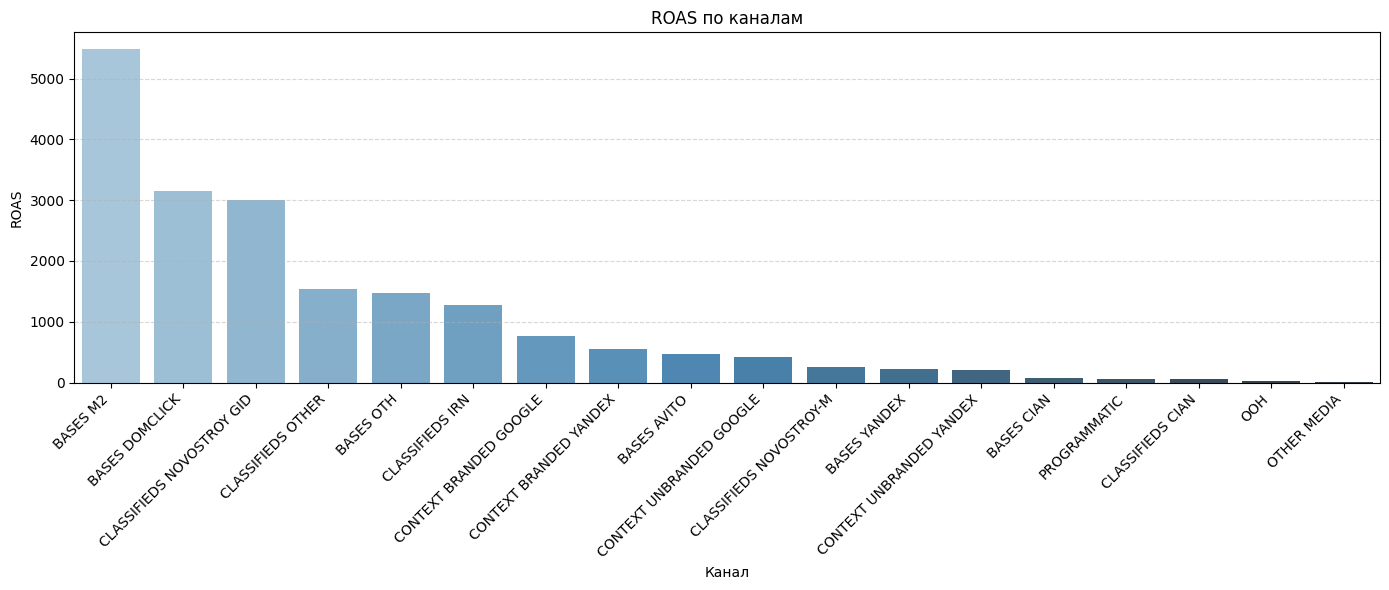

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Сортировка по ROAS
df_sorted = metrics_df.sort_values("ROAS", ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_sorted, x=df_sorted['channel'], y="ROAS", palette="Blues_d")

plt.title("ROAS по каналам")
plt.xlabel("Канал")
plt.ylabel("ROAS")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

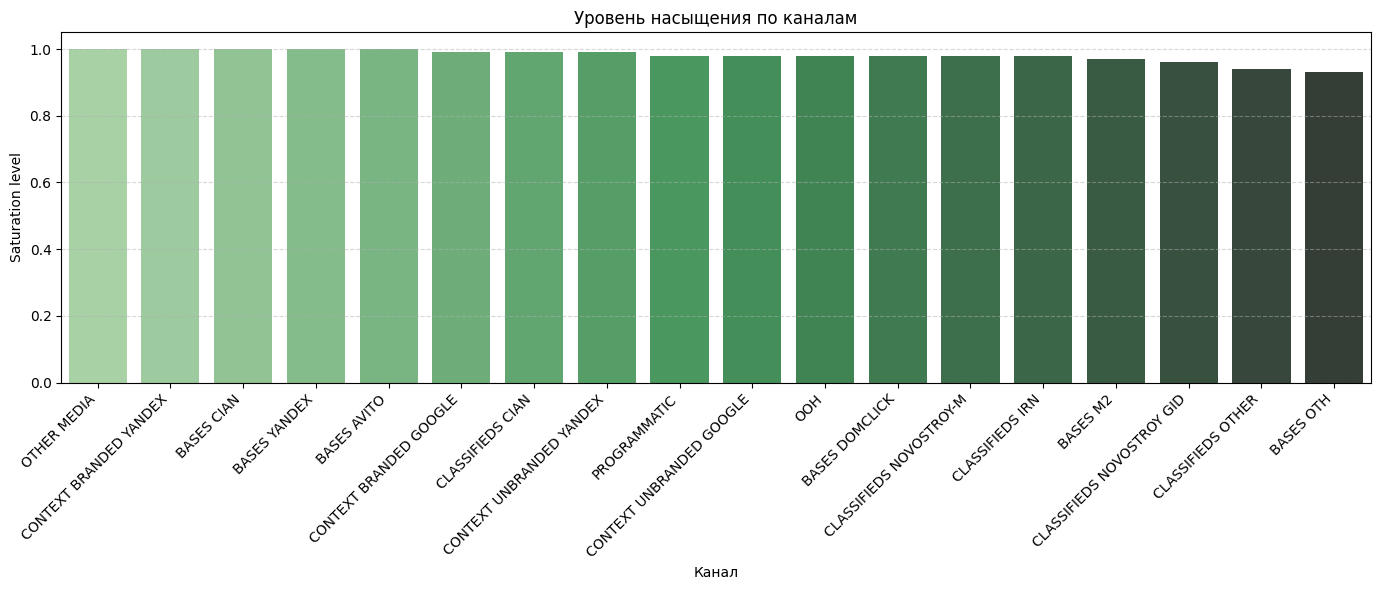

In [164]:
# Сортировка по Saturation
df_sorted = metrics_df.sort_values("saturation", ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_sorted, x=df_sorted['channel'], y="saturation", palette="Greens_d")

plt.title("Уровень насыщения по каналам")
plt.xlabel("Канал")
plt.ylabel("Saturation level")
plt.xticks(rotation=45, ha="right")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

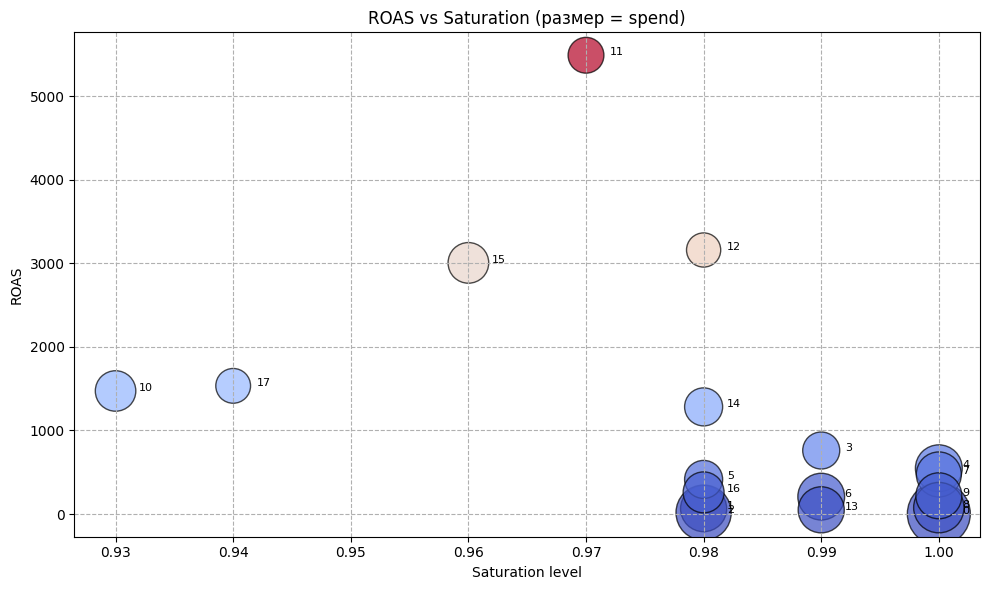

In [155]:
plt.figure(figsize=(10, 6))
plt.scatter(
    metrics_df["saturation"],
    metrics_df["ROAS"],
    s=np.log1p(metrics_df["spend"])**2.5,  # размер пузыря = spend
    alpha=0.7,
    c=metrics_df["ROI"],  # можно заливку по ROI
    cmap="coolwarm",
    edgecolor="k"
)

for i, row in metrics_df.iterrows():
    plt.text(row["saturation"] + 0.002, row["ROAS"], i, fontsize=8)

plt.xlabel("Saturation level")
plt.ylabel("ROAS")
plt.title("ROAS vs Saturation (размер = spend)")
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()

In [166]:
total_spend = metrics_df["spend"].sum()
total_contrib = metrics_df["contribution"].sum()

total_roas = total_contrib / total_spend
total_roi = total_roas - 1

print(f"Total ROAS: {total_roas:.2f}")
print(f"Total ROI:  {total_roi:.2f} ({total_roi * 100:.1f}%)")

Total ROAS: 31.26
Total ROI:  30.26 (3025.5%)
